# Component 1: Procedural, Bespoke Visualization(CUMTD)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image
import gmplot
import webbrowser
from collections import Counter

%matplotlib inline

In [2]:
fn1 = "/Users/Yueya/Desktop/LIS590DataViz/Final_Project/Data/google_transit/shapes.csv"
fn2 = "/Users/Yueya/Desktop/LIS590DataViz/Final_Project/Data/google_transit/stops.csv"
fn3 = "/Users/Yueya/Desktop/LIS590DataViz/Final_Project/Data/google_transit/trips.csv"
fn4 = "/Users/Yueya/Desktop/LIS590DataViz/Final_Project/Data/google_transit/routes.csv"
fn5 = "/Users/Yueya/Desktop/LIS590DataViz/Final_Project/Data/google_transit/stop_times.csv"

In [3]:
# read csv files
shapes = pd.read_csv(fn1)
stops = pd.read_csv(fn2)
trips = pd.read_csv(fn3)
routes = pd.read_csv(fn4)
stoptimes = pd.read_csv(fn5)
lat, lon = 40.1164, -88.2434

## 1.  Route Shape of CUMTD buses

- The first part is to provide the the overall view about the shape of bus routes. The purpose of this part of visualization is to plot differential shapes for each bus route. And project it to actual google map

- The first version of the shape diagram certainly shows the routes of buses in champaign, however the color is geiven by default. 

- After certain discovery about the data, shapes could be linked with route_color in routes.csv file. And with this connection between data, the bus route could have meaningful colors. In order to do this, I used the join function in panda module. This function gives me a new dataframe that contains columns I needed but one problem is that it produces certain amount of redudant data. In second version of route shape diagram, the shape was colored based on the route_color column from route.csv file. The legend was used to provide linkage between color and route name. And the route_short_name column from routes.csv file was adaped as route mark. One of the reason I used route_color and route_short name was that these names and colors is the actual color and name used in our daily life. The means the generated visualization would make more sense for readers

- The third version of buses shape diagram is in the google map format, I used GoogleMapplotter from module gmplot to plot data on google map. The route was colored with same color map used in second version. This approach will generated a html which will open a new window in webbrowser and presents a google map page with the ploted route data. For convinient, I save the screenshot of the html page as a .png file and show it in this notebook. The weakness of this approach is that the generated html file is large and take time to load. I first think it was caused by redundant data generated during join step. And after discussion we believed this was due to the shape data we used  was considerably large

### 1.1_First_version of cumtd buses route shape

This is the very first version of the route shape if cumtd buses

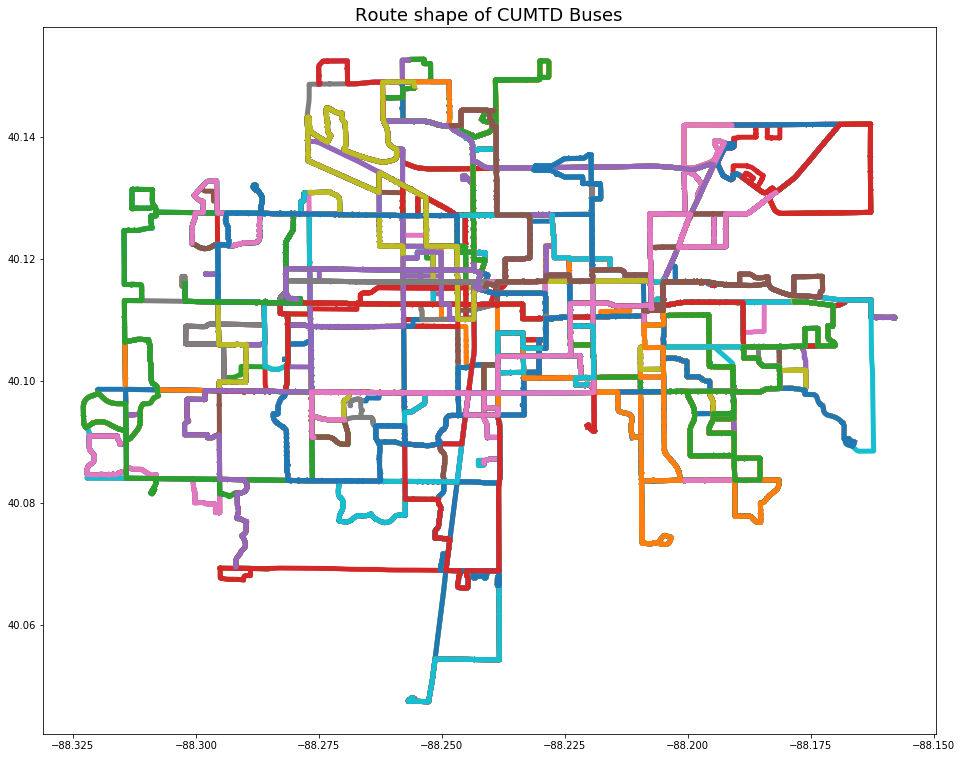

In [4]:
group_by_shapeid = shapes.groupby('shape_id')
plt.figure(figsize=(16, 13))
for shape, group in group_by_shapeid:
    plt.plot(group['shape_pt_lon'],group['shape_pt_lat'], linewidth=5)
plt.title("Route shape of CUMTD Buses", fontsize = 18)
plt.show()

### 1.2_Second Version of cumtd buses route shape

In [5]:
# Version one of data Processing: Link shape_id with route_color by join function

# Only keeps shape_id, latitude, longtitude from shapes.csv
shape1 = shapes[['shape_id', 'shape_pt_lon', 'shape_pt_lat']]

# Only keeps shape_id, route_id, trip_id from trips.csv
trip1 = trips[['shape_id', 'route_id', 'trip_id', 'service_id']]

# Only keeps route_id, route_short_name, route_color from route.csv
route1 = routes[['route_id', 'route_short_name', 'route_color']]


In [6]:
shape1.head()

shape_id  shape_pt_lon  shape_pt_lat
0  [@2.0.86175868@]34    -88.173105     40.114158
1  [@2.0.86175868@]34    -88.173106     40.114158
2  [@2.0.86175868@]34    -88.173107     40.114171
3  [@2.0.86175868@]34    -88.173108     40.114186
4  [@2.0.86175868@]34    -88.173109     40.114200

In [7]:
trip1.head()

shape_id route_id                                         trip_id  \
0      TEAL 26     TEAL  [@14.0.51708725@][4][1277756770140]/0__T4_UIMF   
1      TEAL 23     TEAL  [@14.0.51708725@][4][1275505811421]/0__T4_UIMF   
2  12E TEAL 13     TEAL  [@7.0.41893871@][3][1243541396687]/72__T4_UIMF   
3  12W TEAL 12     TEAL   [@7.0.41893871@][4][1243540851671]/4__T4_UIMF   
4  12E TEAL 13     TEAL  [@7.0.41893871@][3][1243541396687]/74__T4_UIMF   

  service_id  
0    T4 UIMF  
1    T4 UIMF  
2    T4 UIMF  
3    T4 UIMF  
4    T4 UIMF

  
#####  Join shape --> trip --> route

In [8]:
# Join shapes and trips
shape_trip =shape1.join(trip1.set_index('shape_id'), on ='shape_id')
#trip1.set_index('shape_id')
#shape_trip1 = pd.merge(shape1, trip1, right_on='shape_id', left_index=True)
#triproute = pd.merge(trip1, route1, on='route_id', how='left')
# shape_trip.to_csv("shape_trip.csv", index = False)
# Join in routes
shape_trip_route = shape_trip.join(route1.set_index('route_id'), on = 'route_id')
# shape_trip_route.to_csv("shape_trip_route.csv", index = False)

In [9]:
shape_trip_route.head()

shape_id  shape_pt_lon  shape_pt_lat route_id  \
0  [@2.0.86175868@]34    -88.173105     40.114158   ORANGE   
1  [@2.0.86175868@]34    -88.173106     40.114158   ORANGE   
2  [@2.0.86175868@]34    -88.173107     40.114171   ORANGE   
3  [@2.0.86175868@]34    -88.173108     40.114186   ORANGE   
4  [@2.0.86175868@]34    -88.173109     40.114200   ORANGE   

                                      trip_id service_id  route_short_name  \
0  [@2.0.86175868@][1458585713139]/96__GN7_MF     GN7 MF                 6   
1  [@2.0.86175868@][1458585713139]/96__GN7_MF     GN7 MF                 6   
2  [@2.0.86175868@][1458585713139]/96__GN7_MF     GN7 MF                 6   
3  [@2.0.86175868@][1458585713139]/96__GN7_MF     GN7 MF                 6   
4  [@2.0.86175868@][1458585713139]/96__GN7_MF     GN7 MF                 6   

  route_color  
0      f99f2a  
1      f99f2a  
2      f99f2a  
3      f99f2a  
4      f99f2a

##### Get color for each shape and route
After get new data frame, I create two dictionaries used to store color for each shape and each route. 

In [10]:
# get color of each route
colorgroup = shape_trip_route.groupby(['shape_id','route_color'])
routecolors = list(colorgroup.groups.keys())
#routecolors=[]
#for color, group in colorgroup:
#  routecolors.append(color)
routecolorDict={}
for i in range(len(routecolors)):
    routecolorDict[routecolors[i][0]] = '#'+routecolors[i][1]

In [11]:
# create legend
legend_group = shape_trip_route.groupby(['route_short_name','route_color'])
legend=[]
for color, group in legend_group:
    legend.append(color)
legendDict = {}
for i in range(len(legend)):
    if '#'+legend[i][1] not in legendDict.keys():
        legendDict['#'+legend[i][1]] = legend[i][0]
    else:
        legendDict['#'+legend[i][1]]=(legendDict['#'+legend[i][1]].astype(str)+','+legend[i][0].astype(str))

In [12]:
legendDict

{'#000000': 21,
 '#006991': '12,120',
 '#008063': '5,50',
 '#2b3088': 14,
 '#355caa': 4,
 '#5a1d5a': '22,220',
 '#808285': '7,70',
 '#823822': 9,
 '#825622': 9,
 '#9e8966': 8,
 '#a78bc0': '3,30',
 '#b2d235': 180,
 '#c7994a': 10,
 '#cccccc': '13,130',
 '#d1d3d4': 130,
 '#eb008b': '11,110',
 '#ed1c23': 20,
 '#ed1c24': 2,
 '#f99f2a': 6,
 '#fcee1f': '1,100',
 '#ffbfff': 16}

In [13]:
# plot with defined color in routes.csv
def plot_shape1():
    group_by_route = shapes.groupby('shape_id')
    plt.figure(figsize=(16, 13))
    for shape, group in group_by_route:
        #print(routecolorDict[shape])
        plt.plot(group['shape_pt_lon'],group['shape_pt_lat'], color = routecolorDict[shape], linewidth=5)
    
    plt.title("Route shape of CUMTD Buses", fontsize = 18)
    plt.ylabel("Latitude", fontsize = 18)
    plt.xlabel("Longitude", fontsize = 18) 
    colors_patch=[]
    for key, item in legendDict.items():
        colors_patch.append(mpatches.Patch(color=key, label=legendDict[key]))
    plt.legend(handles=colors_patch, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
    plt.show()

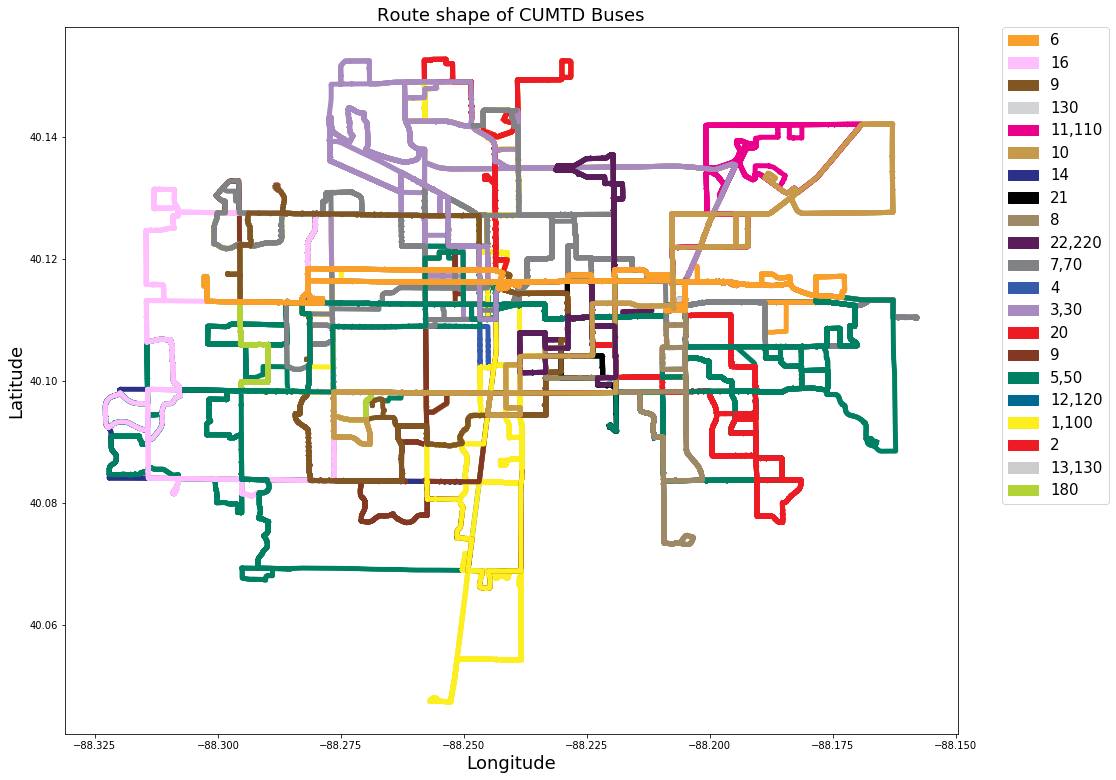

In [14]:
plot_shape1()

### 1.3_Third Version of  cumtd buses route shape_Google Map

In [15]:
group_by_shapeid = shapes.groupby('shape_id')
shapekeys = group_by_shapeid.groups.keys()

shapelatDict={}
shapelonDict={}
for shape, group in group_by_shapeid:
    shapelatDict[shape] = (group['shape_pt_lat'].tolist())
    shapelonDict[shape] = (group['shape_pt_lon'].tolist())

In [16]:
def googlemap_Plot():
    #lat, lon = 40.1164, -88.2434    

    gmap = gmplot.GoogleMapPlotter(lat,lon, 18)
    for key in shapelatDict:
        gmap.plot(shapelatDict[key],shapelonDict[key], edge_width=5, color = routecolorDict[key])
    gmap.draw("shapemap.html")

In [17]:
googlemap_Plot()

In [18]:
filename="file:///Users/Yueya/Desktop/LIS590DataViz/Final_Project/shapemap.html"
webbrowser.open_new(filename)

True

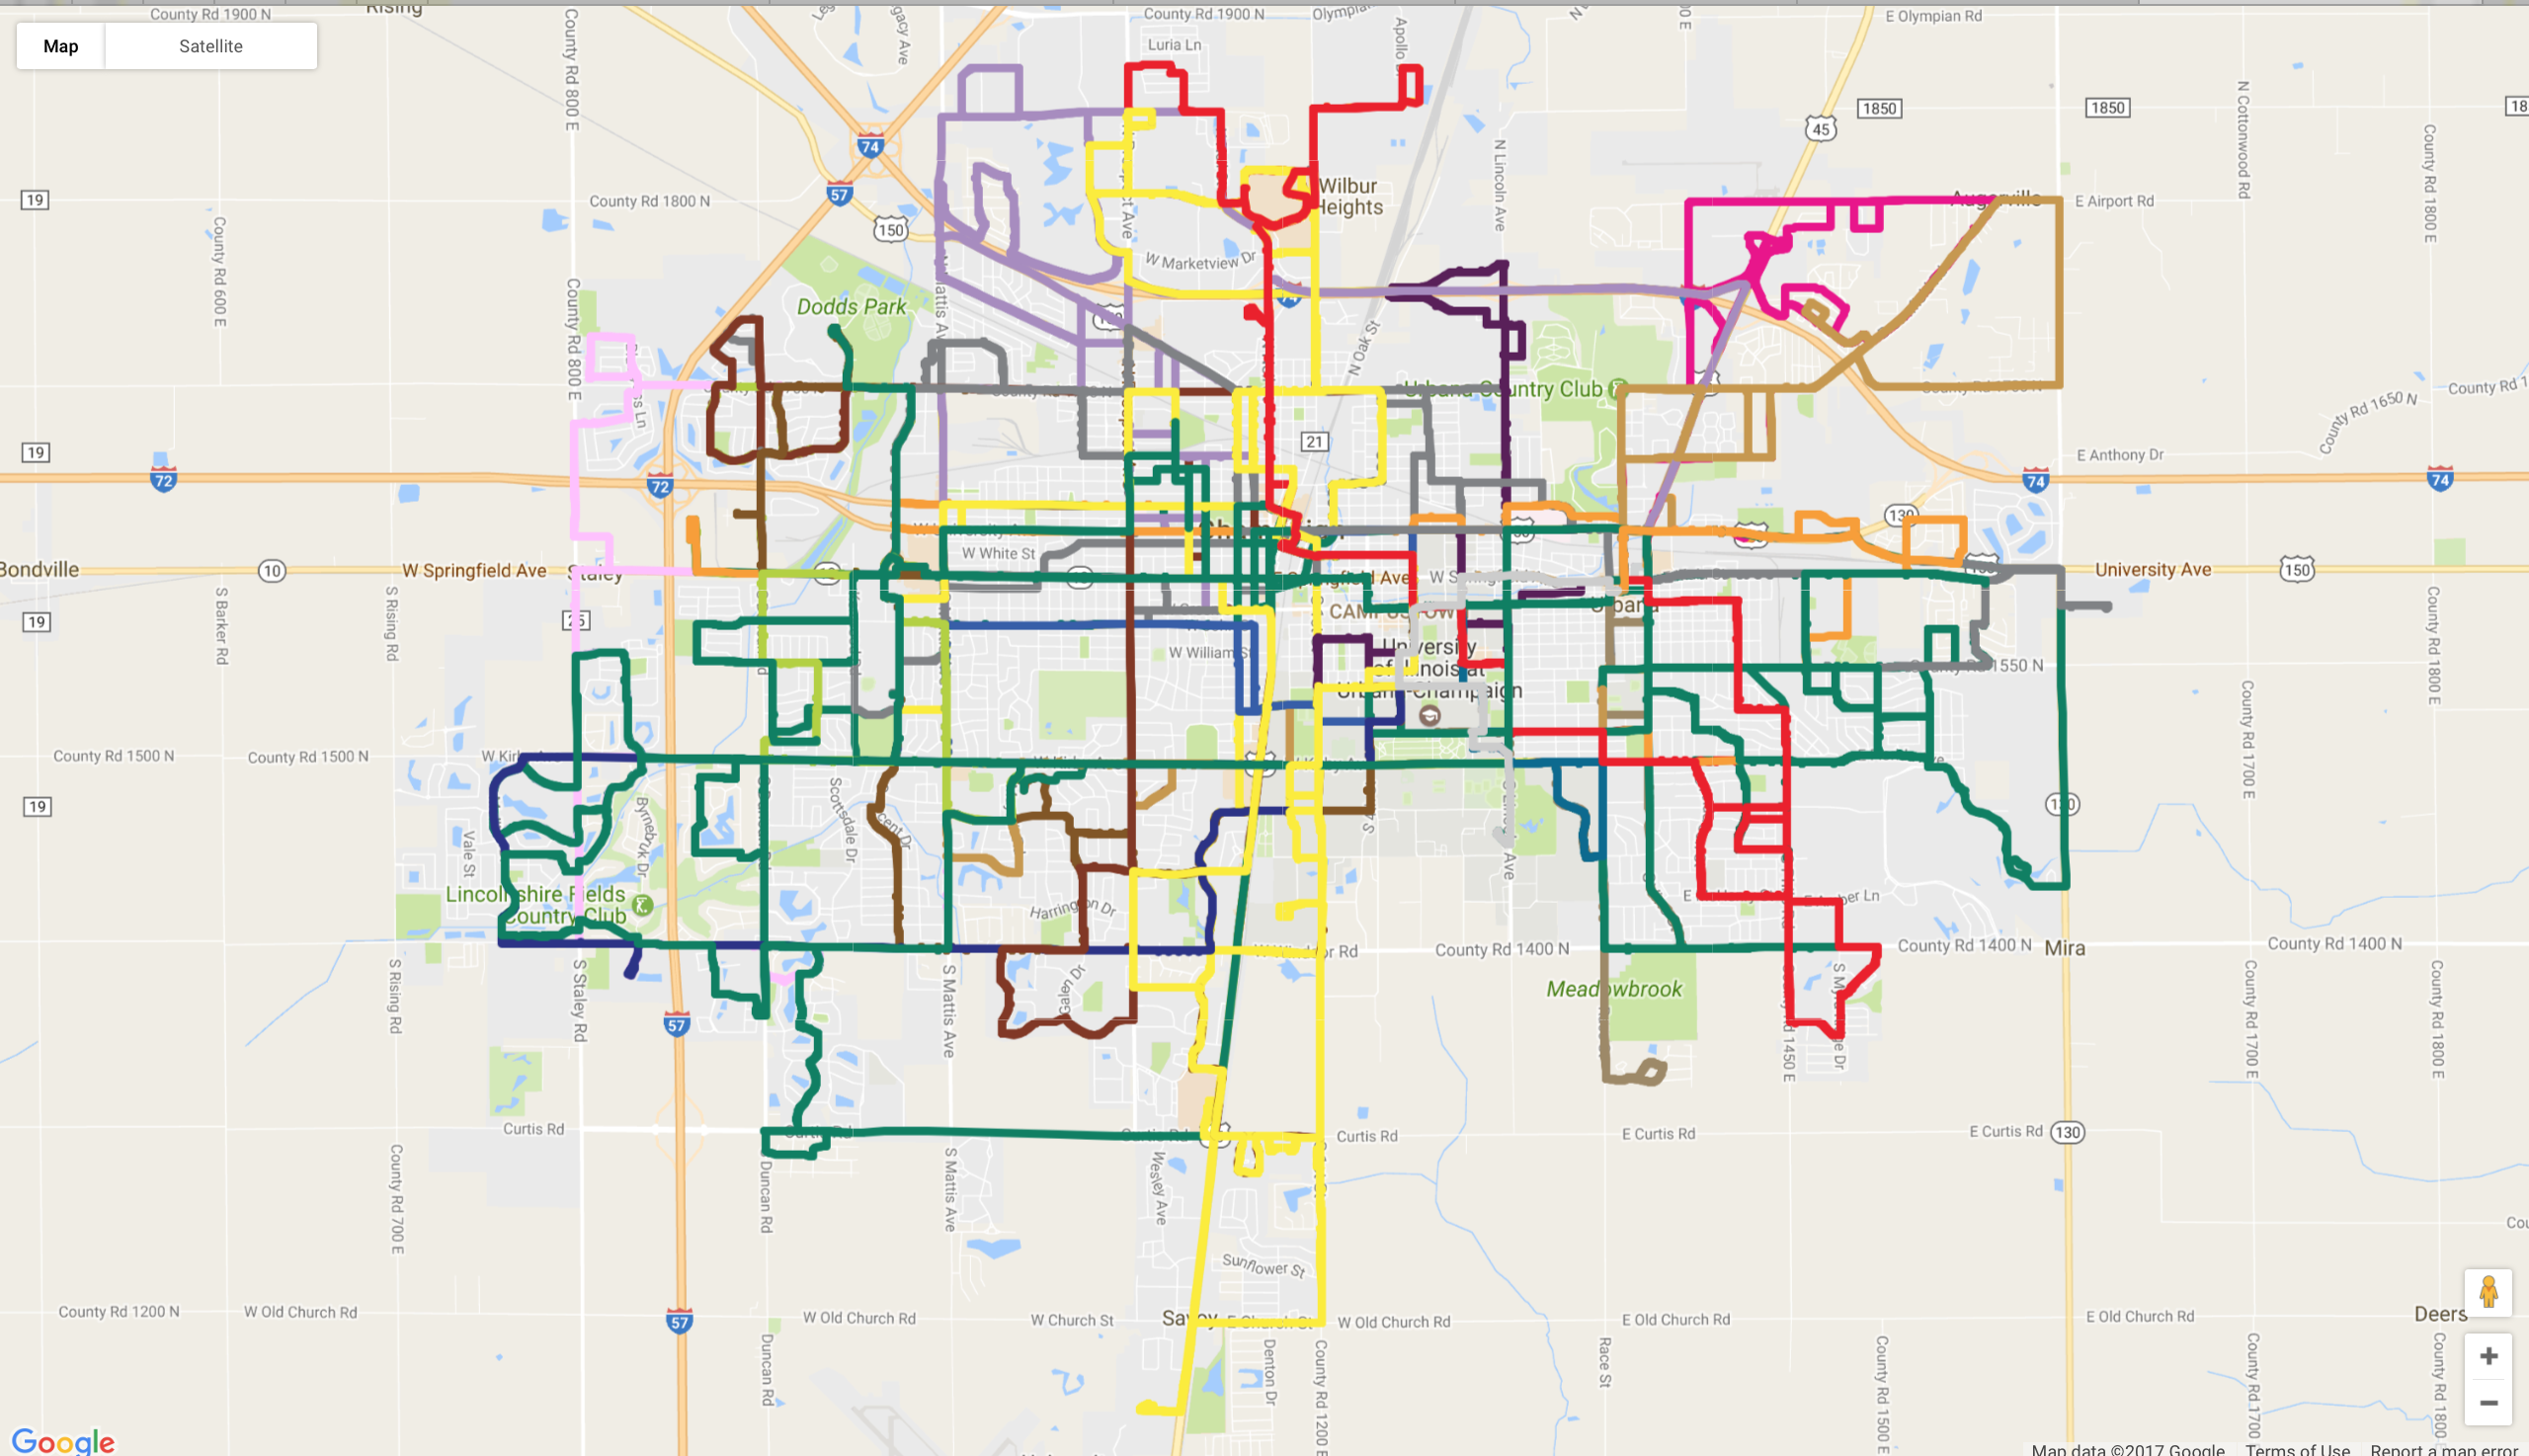

In [19]:
# show generated html file as image

from IPython.display import Image
Image(filename='/Users/Yueya/Desktop/LIS590DataViz/Final_Project/shape_map.png') 

## 2. Stops Distribution

- The second part is to provide overview about the distribution of bus stops over champaign. The purpose of this visualization is to draw scatter plot using the data, marked the stop on different route with color and project it on google map

- The first version of bus distribution was ploted by pyplot.scatter(). In order to get the color for each bus stop, the path from stop-->stop_time-->trips-->route was followed. A new dataframe was generated by join function, which contains column stop_id, the latitude and longitude of bus stop, the route_color for different route. 

- The second version of bus distribution was ploted on the google map. Same module gmplot and function GoogleMapPlotter was used in mapping data to google map. One html file was generated and same problem was occured again, the size of generated html file. After the whole page was loaded I took the screenshot and it was showed in this notebook. 

- The third one was the visualization about the popularity of the bus stops. The popularity of the bus stops was based on how many routes will pass them. In other words, the number of colors them have. Since the bus stop that is contained by more routes is considered more popular and more important. For example, the stop 'trasit plaza' have much more routes than stop 'Market place'. And clearly trasit plaze is a bus stop more popular. In this visualization, the color was assigned to stop point from dark to white based on the number of routes they belong to. The stops have more larger than 5 routes was marked with dark color and others was marked with light color.  And was projected on google map. (The screenshot of generated html file was showed)

- The last one was the disstribution of bus stops in different zone. It was based on the zone_id of each stops and different color was assigned to different zone area to disguish the difference. This diagram divided the bus stops into campus_town area and out_of_campus area

In [20]:
# Define colors
# Only keeps stop_id, latitude, longtitude from stops.csv
stop2 = stops[['stop_id', 'stop_lon', 'stop_lat', 'zone_id']]

# Only keeps trip_id, stop_id from stop_times.csv
stoptime2 = stoptimes[['trip_id', 'stop_id']]

# Only keeps route_id, trip_id from trips.csv
trip2 = trips[['route_id', 'trip_id']]

# Only keeps route_id, route_short_name, route_color from route.csv
route2 = routes[['route_id', 'route_color']]

In [21]:
# Join stops and stoptimes
stop_stoptime =stop2.join(stoptime2.set_index('stop_id'), on ='stop_id')

# Join trips
stop_stoptime_trip = stop_stoptime.join(trip2.set_index('trip_id'), on = 'trip_id')

# Join routes
stop_route = stop_stoptime_trip.join(route2.set_index('route_id'), on = 'route_id')

In [22]:
stop_stoptime.head()

stop_id   stop_lon   stop_lat  zone_id  \
0  KBYWSFLD:3 -88.290173  40.098248        1   
0  KBYWSFLD:3 -88.290173  40.098248        1   
0  KBYWSFLD:3 -88.290173  40.098248        1   
0  KBYWSFLD:3 -88.290173  40.098248        1   
0  KBYWSFLD:3 -88.290173  40.098248        1   

                                          trip_id  
0   [@2.0.84953216@][1455638733399]/0__GNX1_SCHMF  
0                             1GNX102__GNX1_SCHMF  
0   [@15.0.73009433@][12][1402684630565]/0__LM1SA  
0  [@15.0.73009433@][12][1402678004645]/23__LM1SA  
0  [@15.0.73009433@][12][1402678524643]/25__LM1SA

In [23]:
stop_route.head()

stop_id   stop_lon   stop_lat  zone_id  \
0  KBYWSFLD:3 -88.290173  40.098248        1   
0  KBYWSFLD:3 -88.290173  40.098248        1   
0  KBYWSFLD:3 -88.290173  40.098248        1   
0  KBYWSFLD:3 -88.290173  40.098248        1   
0  KBYWSFLD:3 -88.290173  40.098248        1   

                                          trip_id           route_id  \
0   [@2.0.84953216@][1455638733399]/0__GNX1_SCHMF  GREEN EXPRESS ALT   
0                             1GNX102__GNX1_SCHMF      GREEN EXPRESS   
0   [@15.0.73009433@][12][1402684630565]/0__LM1SA      LIME SATURDAY   
0  [@15.0.73009433@][12][1402678004645]/23__LM1SA      LIME SATURDAY   
0  [@15.0.73009433@][12][1402678524643]/25__LM1SA      LIME SATURDAY   

  route_color  
0      008063  
0      008063  
0      b2d235  
0      b2d235  
0      b2d235

In [24]:
stoproute_group = stop_route.groupby('route_color')
colors = stoproute_group.groups.keys()
colors

dict_keys(['008063', 'd1d3d4', 'fcee1f', '355caa', '006991', '2b3088', '5a1d5a', 'b2d235', '823822', 'c7994a', '808285', 'a78bc0', 'ed1c23', 'cccccc', 'ed1c24', '825622', 'ffbfff', '000000', '9e8966', 'f99f2a', 'eb008b'])

### 2.1_Stop Distribution_first version

In [25]:
def stop_plot():
    plt.figure(figsize=(16, 13))
    
    for keys in colors:
        plt.scatter(list(stoproute_group.get_group(keys)['stop_lat']), list(stoproute_group.get_group(keys)['stop_lon']), color = "#"+keys)
#plt.scatter(list(stopcolor_group.get_group('008063')['stop_lat']), list(stopcolor_group.get_group('008063')['stop_lon']), color = "#008063")
    plt.title("Stop Distribution", fontsize = 18)
    plt.ylabel("Latitude", fontsize = 18)
    plt.xlabel("Longitude", fontsize = 18) 

    colors_patch = []
    for key, item in legendDict.items():
        colors_patch.append(mpatches.Patch(color=key, label=legendDict[key]))
    plt.legend(handles=colors_patch,
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
    plt.show()

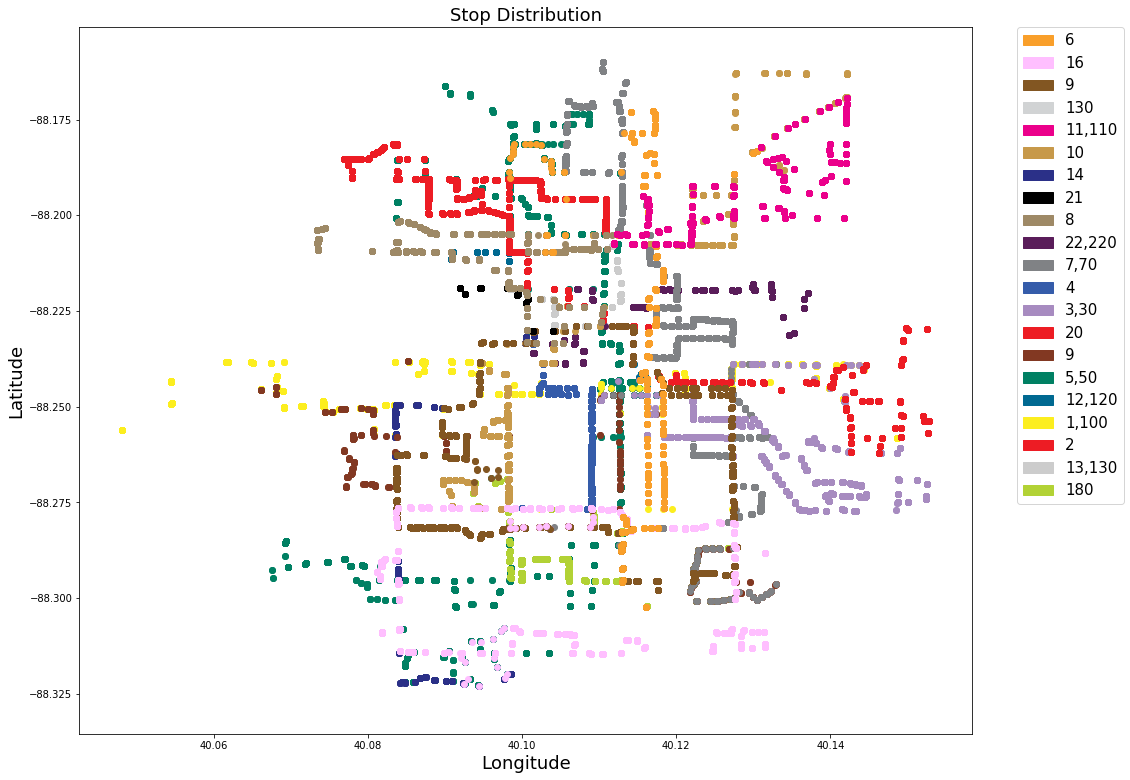

In [26]:
stop_plot()

### 2.2_Distribution of bus stops on Google Map

In [27]:
def stop_plot1():
    gmap = gmplot.GoogleMapPlotter(lat,lon, 18)
    for keys in colors:
        gmap.scatter(list(stoproute_group.get_group(keys)['stop_lat']), list(stoproute_group.get_group(keys)['stop_lon']), size=40, marker=False, color = "#"+keys)
    gmap.draw("stops.html")

In [28]:
stop_plot1()

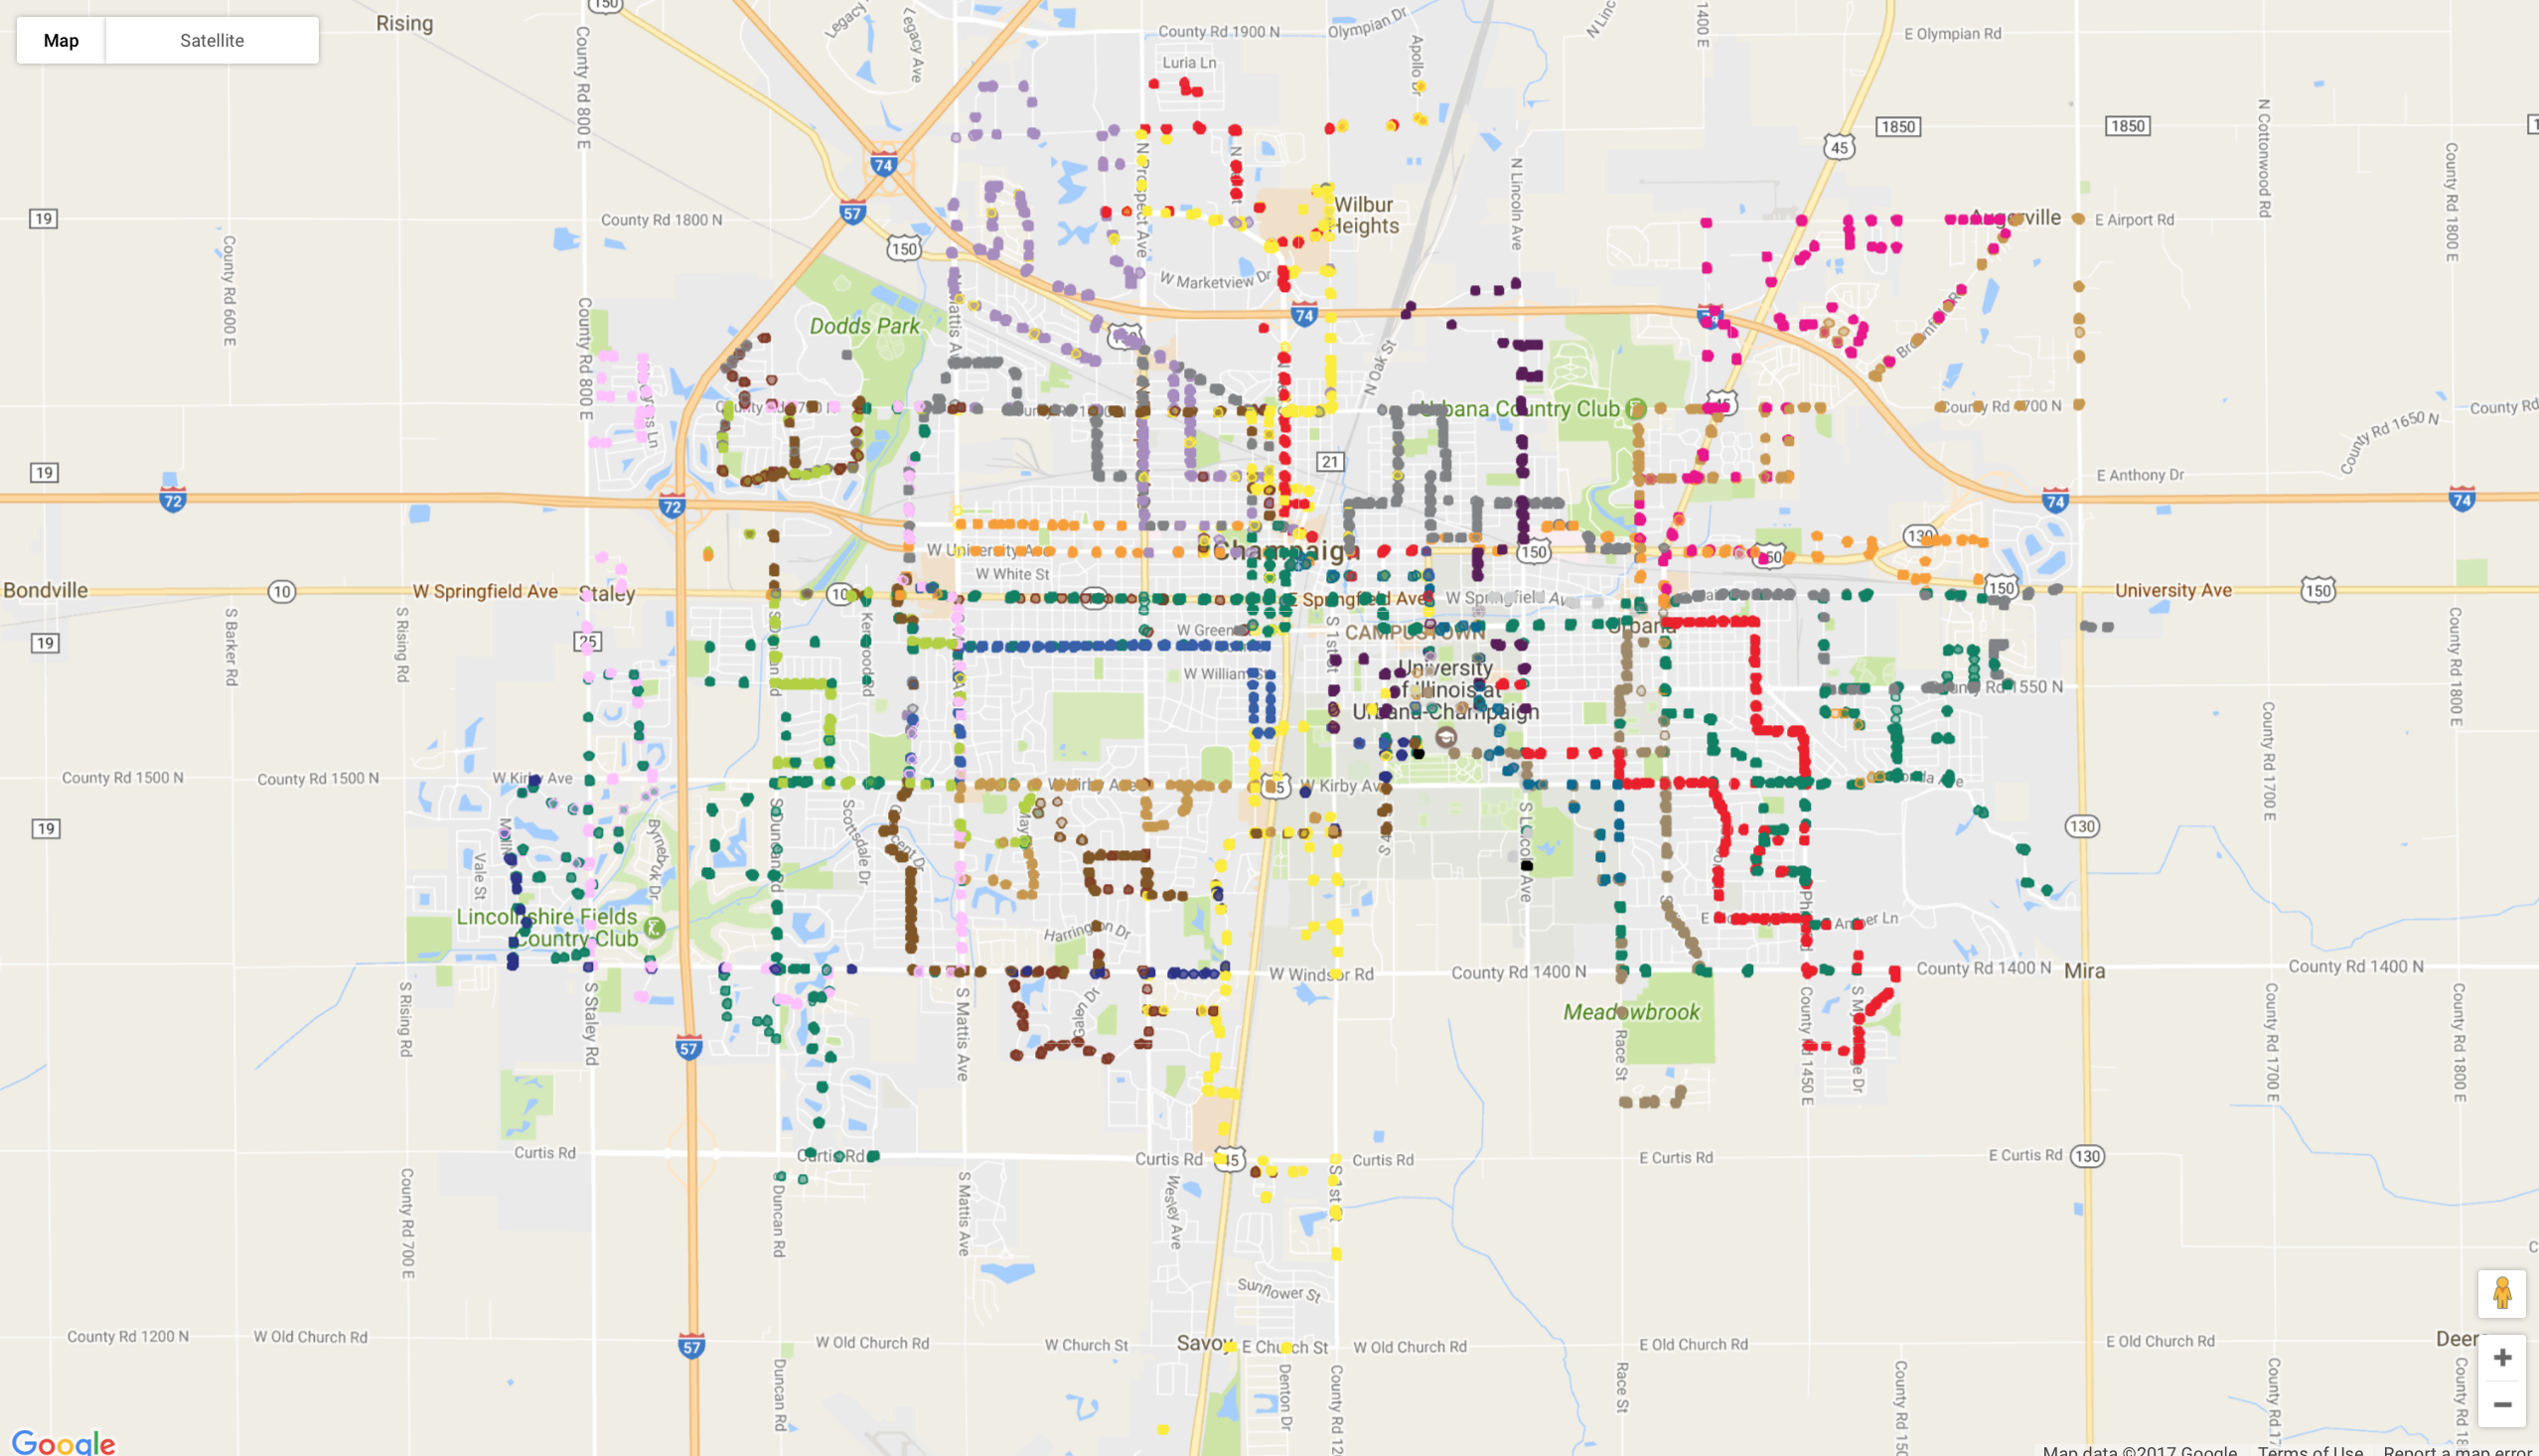

In [29]:
# This part could open the generated html file in new web browser, but the file is too large and need
# a long time to load completely

#filename1="file:///Users/Yueya/Desktop/LIS590DataViz/Final_Project/stops.html"
#webbrowser.open_new(filename1)



# show generated html file as image
#Image(filename='/Users/Yueya/Desktop/LIS590DataViz/Final_Project/stops1.png')
Image(filename='/Users/Yueya/Desktop/LIS590DataViz/Final_Project/stop_map.png')

### 2.3_The popularity of Bus stops

Since some stops are belong to more than one route, we should distinguish them from others by assigning them different colors based on the number of colors they had

In [30]:
stop_colorDict1 = {}
for item in stop_route['stop_id'].unique():
    stop_colorDict1[item] = stop_route[stop_route['stop_id']==item]['route_color'].unique()

    c=[]
for key in stop_colorDict1:
    c.append(len(stop_colorDict1[key]))
    
stop_colorDict={}
for key, value in stop_colorDict1.items():
    stop_colorDict[key] = list(value)

In [31]:
stop_colormap={}
stop_colormap[21] = '#000000'
stop_colormap[11] = '#000000'
stop_colormap[9] = '#311015'
stop_colormap[8] = '#311015'
stop_colormap[7] = '#49191f'
stop_colormap[6] = '#49191f'
stop_colormap[5] = '#49191f'
stop_colormap[4] = '#49191f'
stop_colormap[3] = '#49191f'
stop_colormap[2] = '#fbbac3'
stop_colormap[1] = '#fbbac3'

In [32]:
for key, value in stop_colorDict.items():
    stop_colorDict[key].append(stop_colormap[len(stop_colorDict[key])])
    
stop_colorDict2={}
for key, value in stop_colorDict.items():
    stop_colorDict2[key] = value[-1]
    
list1=[]
for item in stop_colorDict2.keys():
    list1.append(item)

cddf = pd.DataFrame({'stop_id': list(stop_colorDict2.keys()),'color': list(stop_colorDict2.values())})
color_pop1 = stops.join(cddf.set_index('stop_id'), on='stop_id')

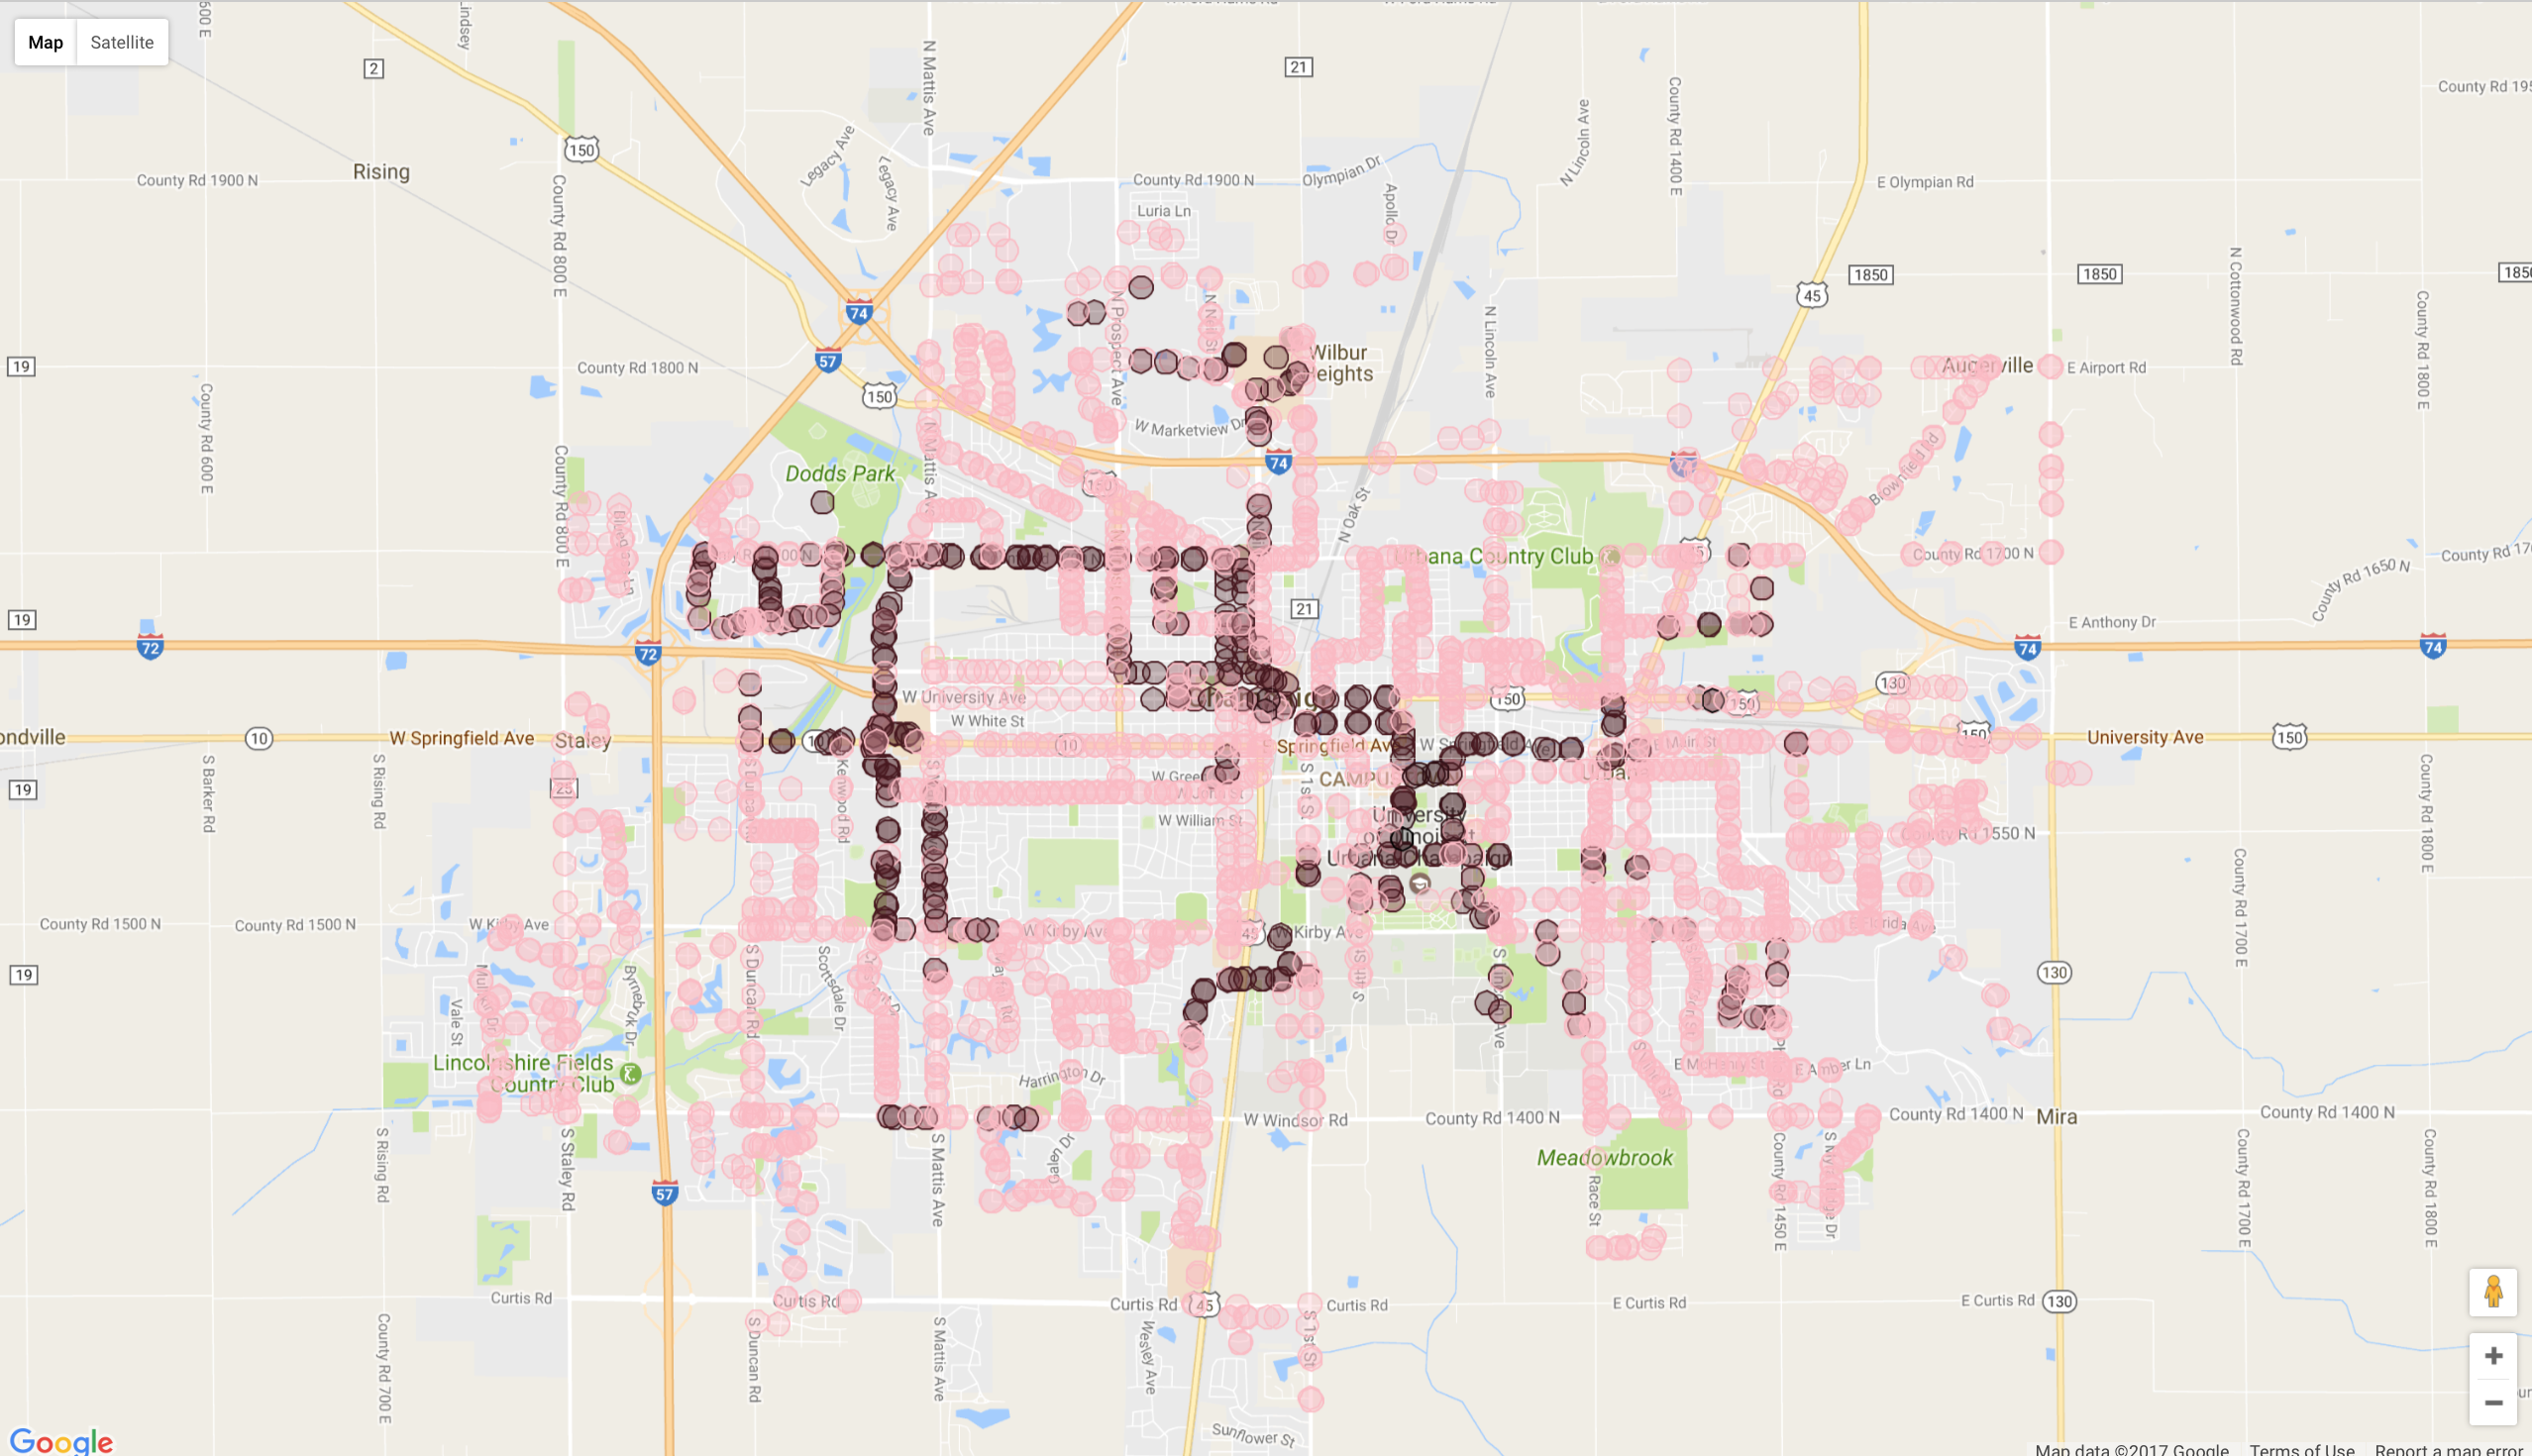

In [33]:
c_group = color_pop1.groupby('color')
c_group.groups.keys()
gmap = gmplot.GoogleMapPlotter(lat,lon, 16)
for key in c_group.groups.keys():
    gmap.scatter(c_group.get_group(key)['stop_lat'], c_group.get_group(key)['stop_lon'], color = key, size=100, marker=False)
gmap.draw("bus_popularity.html")
Image(filename='/Users/Yueya/Desktop/LIS590DataViz/Final_Project/bus_popularity.png')

### 2.4_Show the Distribution based on different zone

In [34]:
stops['zone_id'][0]

1

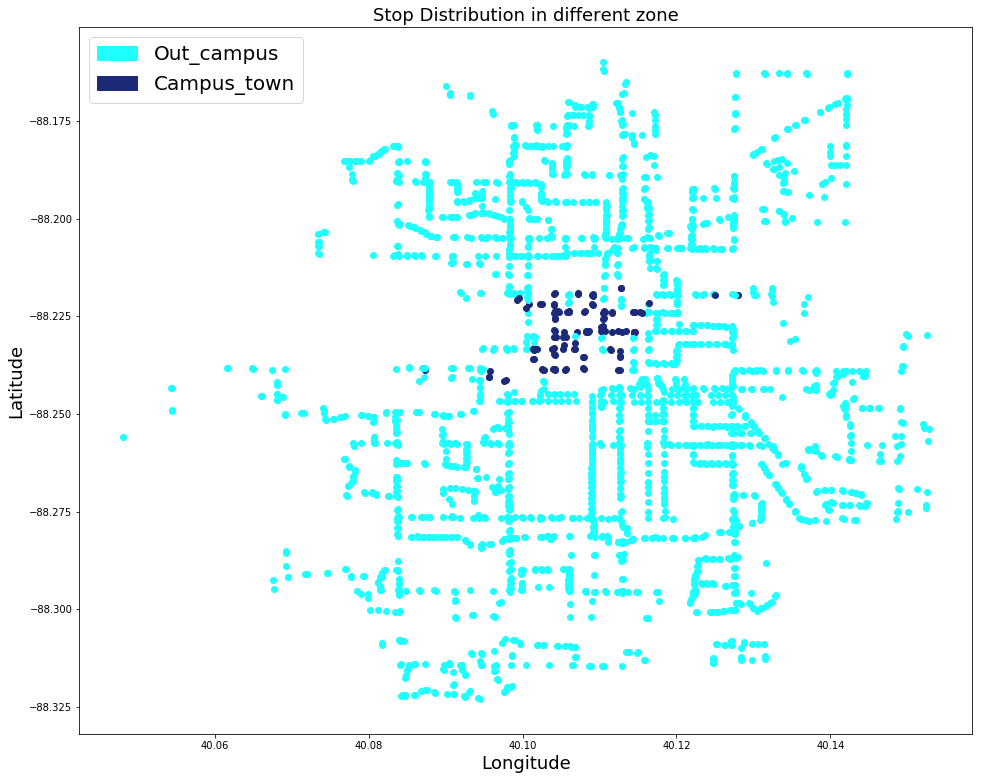

In [35]:
plt.figure(figsize=(16, 13))
for i in range(len(stops['zone_id'])):
    if stops['zone_id'][i] == 1:
        plt.scatter(stops['stop_lat'][i], stops['stop_lon'][i], color = "#1fffff")
    elif stops['zone_id'][i] == 2:
        plt.scatter(stops['stop_lat'][i], stops['stop_lon'][i], color = "#1d2a77")
plt.title("Stop Distribution in different zone", fontsize = 18)
plt.ylabel("Latitude", fontsize = 18)
plt.xlabel("Longitude", fontsize = 18)
colors_patch1 = mpatches.Patch(color="#1fffff", label="Out_campus")
colors_patch2 = mpatches.Patch(color="#1d2a77", label="Campus_town")
plt.legend(handles=[colors_patch1, colors_patch2], fontsize = 20, loc='upper left')
plt.show()

## 3. Number of Buses on each routes

- This part is about the relationship between buses and routes. The first diagram was simple plot which shows the distribution of the number of buses on each routes. In this plot, the bumber of buses was calculated based on 'service_id' variables. We are only very certain use which column as the unique identifier for each bus. After discussion we decided to lay our choice on 'service_id'. And routes was identified by 'route_id'

- Based on first bar chart, we selected the top fifteen routes to show the most popular or busy bus route around chapmaign area. It was projected on Google map and was showed as the screenshot of generated html file.'

### 3.1_Number of Buses on each routes

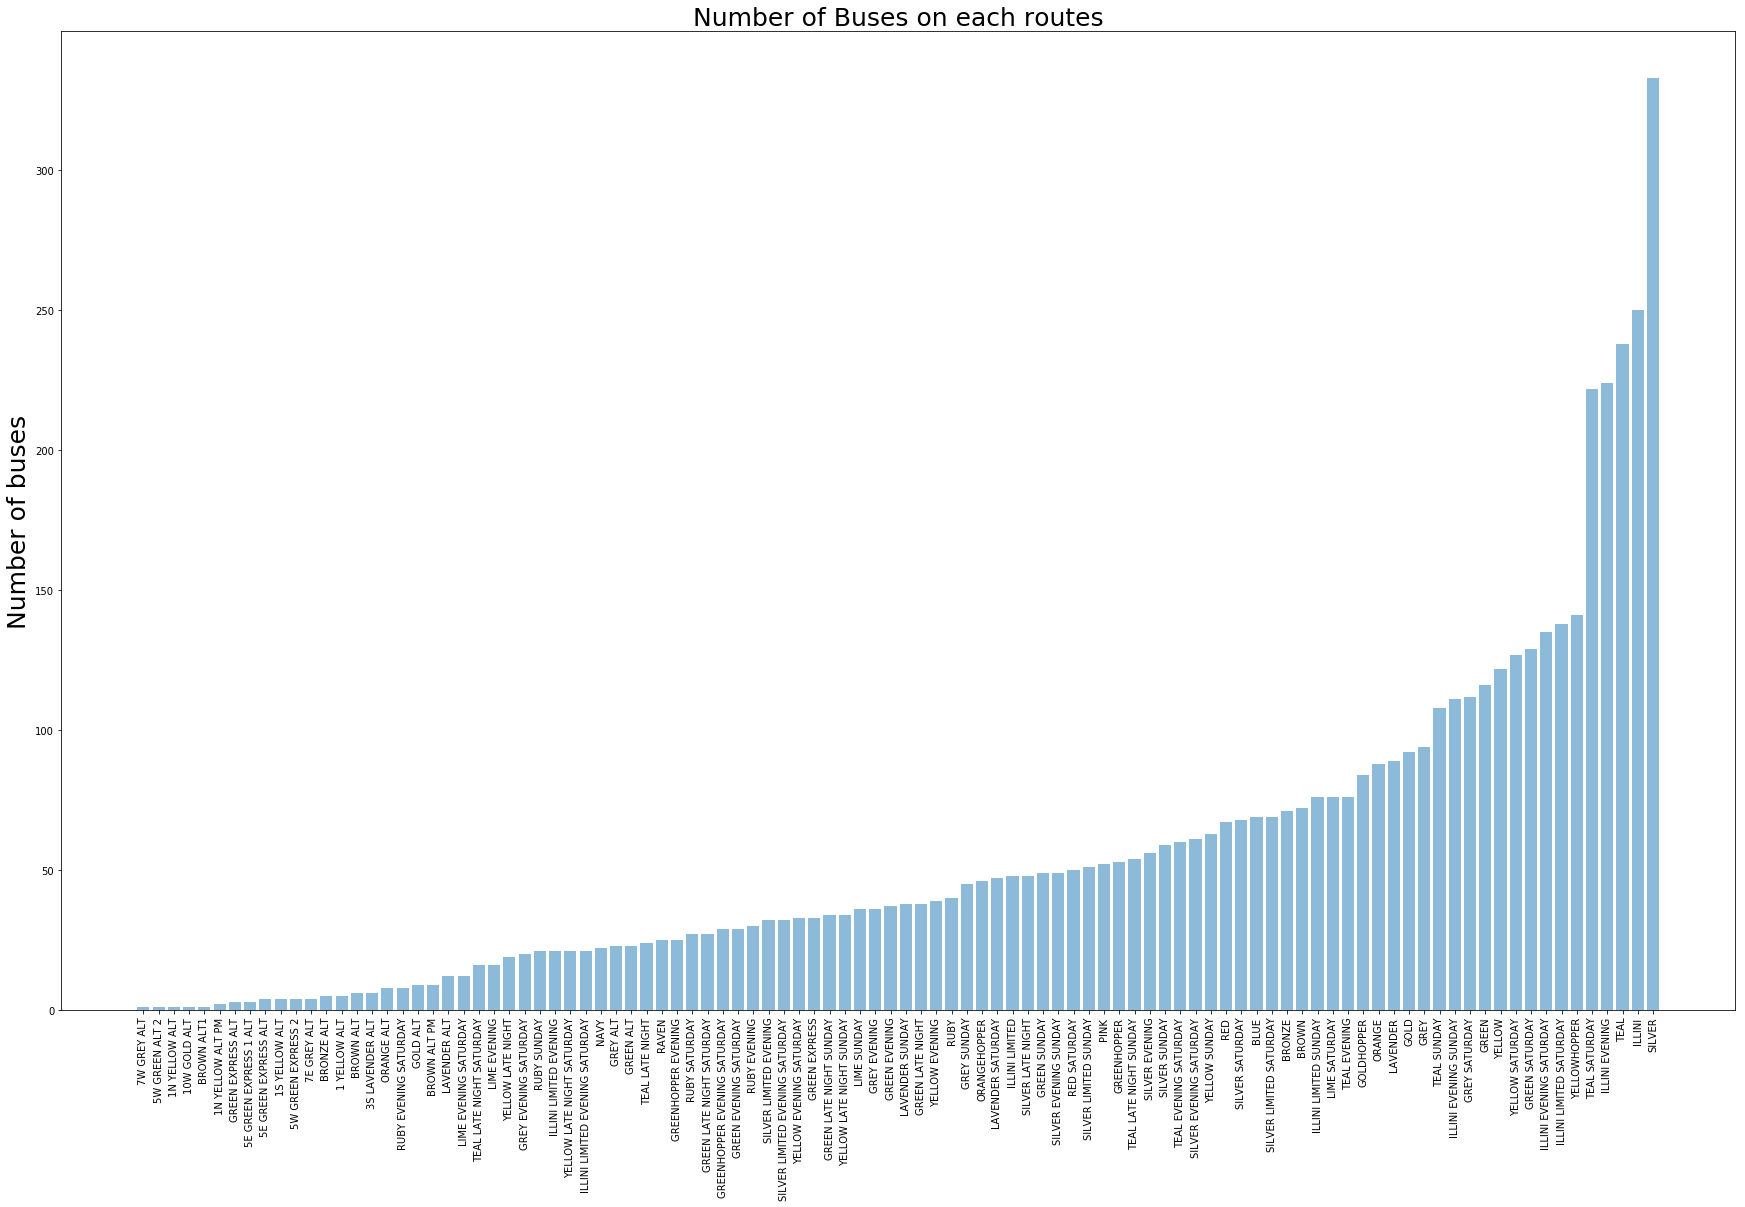

In [36]:
#shape_trip_route['route_short_name']
busgroup = trips[['route_id', 'service_id']].groupby('route_id')
routekey = busgroup.groups.keys()

buscount={}
for keys in routekey:
    buscount[keys] = (len(list(busgroup.get_group(keys)['service_id'])))

buscount_sort = sorted(buscount.items(), key=lambda buscount: buscount[1])
routesid = [el[0] for el in buscount_sort]
routes_obj = tuple(routesid)
x_value = np.arange(len(routes_obj))
y_value = [el[1] for el in buscount_sort]

plt.figure(figsize=(30, 18))
plt.bar(x_value, y_value, align = 'center', alpha = 0.5)
plt.xticks(x_value, routes_obj, rotation='vertical')
plt.ylabel('Number of buses', fontsize = 25)
plt.title('Number of Buses on each routes', fontsize = 25)
plt.show()

### 3.2_The most busy bus routes in Champaign area

In [37]:
route_popular = [ ('TEAL SUNDAY', 108),
('ILLINI EVENING SUNDAY', 111),
 ('GREY SATURDAY', 112),
 ('GREEN', 116),
 ('YELLOW', 122),
 ('YELLOW SATURDAY', 127),
 ('GREEN SATURDAY', 129),
 ('ILLINI EVENING SATURDAY', 135),
 ('ILLINI LIMITED SATURDAY', 138),
 ('YELLOWHOPPER', 141),
 ('TEAL SATURDAY', 222),
 ('ILLINI EVENING', 224),
 ('TEAL', 238),
 ('ILLINI', 250),
 ('SILVER', 333)]

In [38]:
groupa = shape_trip_route.groupby('route_id')

In [39]:
# get color of each route
colorag = routes.groupby(['route_id','route_color'])
routecolorsa = list(colorag.groups.keys())
#routecolors=[]
#for color, group in colorgroup:
#  routecolors.append(color)
coloragDict={}
for i in range(len(routecolorsa)):
    coloragDict[routecolorsa[i][0]] = '#'+routecolorsa[i][1]

In [40]:
coloragDict['GREY SATURDAY']

'#808285'

In [41]:
keysa = (['TEAL SUNDAY','ILLINI EVENING SUNDAY', 'GREY SATURDAY', 'GREEN', 'YELLOW','YELLOW SATURDAY', 'GREEN SATURDAY','ILLINI EVENING SATURDAY','ILLINI LIMITED SATURDAY','YELLOWHOPPER', 'TEAL SATURDAY', 'ILLINI EVENING','TEAL', 'ILLINI','SILVER'])

In [42]:
gmap = gmplot.GoogleMapPlotter(lat,lon, 18)
#gmap.plot(list(groupa.get_group('TEAL SUNDAY')['shape_pt_lat']), list(groupa.get_group('TEAL SUNDAY')['shape_pt_lon']), edge_width=5, color = '#006991')
#gmap.plot(list(groupa.get_group('ILLINI EVENING SUNDAY')['shape_pt_lat']), list(groupa.get_group('ILLINI EVENING SUNDAY')['shape_pt_lon']), edge_width=5, color = '#5a1d5a')
gmap.plot(list(groupa.get_group('GREY SATURDAY')['shape_pt_lat']), list(groupa.get_group('GREY SATURDAY')['shape_pt_lon']), edge_width=5, color = '#808285')
gmap.draw("test.html")

In [43]:
gmap = gmplot.GoogleMapPlotter(lat,lon, 18)
for key in keysa:
    gmap.plot(list(groupa.get_group(key)['shape_pt_lat']), list(groupa.get_group(key)['shape_pt_lon']), edge_width=5, color = coloragDict[key] )
gmap.draw("route_popular.html")

## 4. Number of Stops on each route

- This part showed a simple bar plot which showed the number of bus stops on each route. 

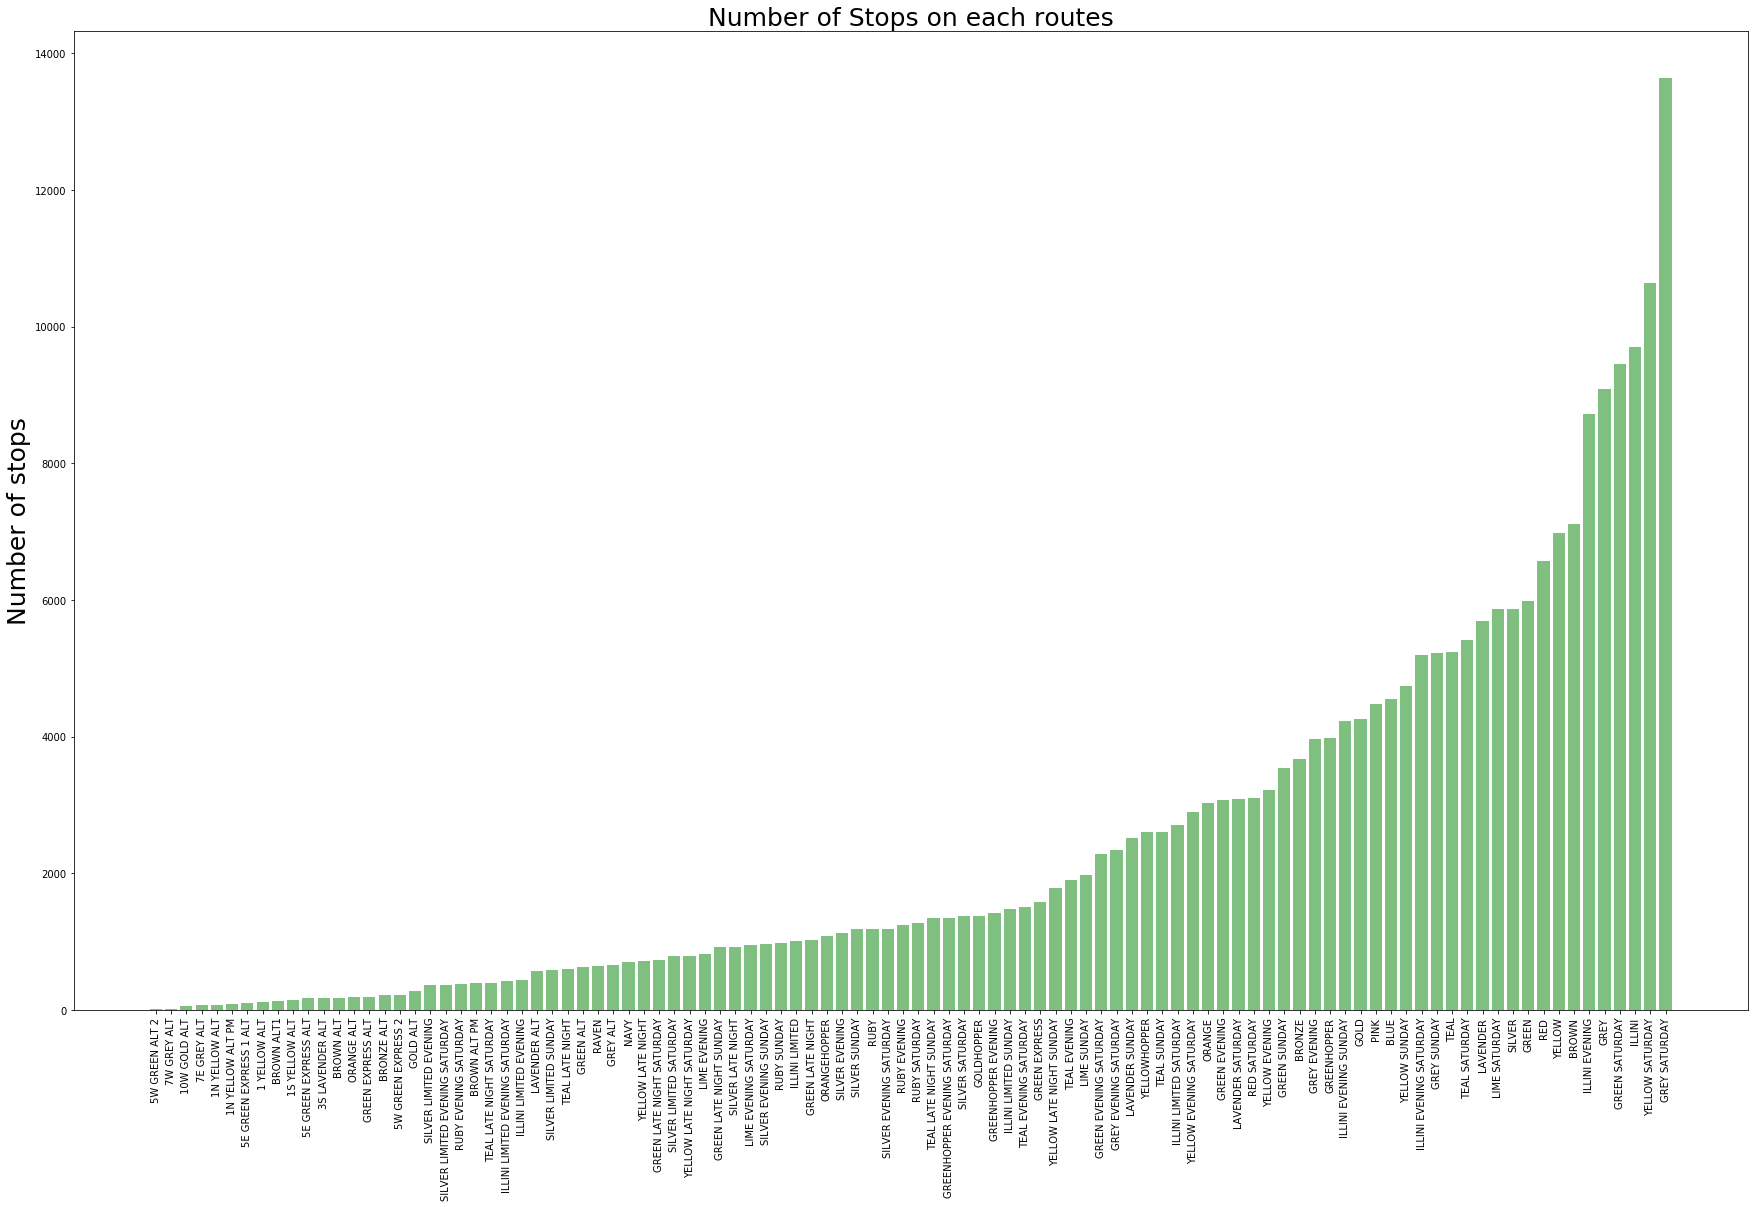

In [44]:
stopgroup = stop_route.groupby('route_id')
routekey1 = stopgroup.groups.keys()

stopcount={}
for keys in routekey1:
    stopcount[keys] = (len(list(stopgroup.get_group(keys)['stop_id'])))

stopcount_sort = sorted(stopcount.items(), key=lambda stopcount: stopcount[1])
routesid1 = [el[0] for el in stopcount_sort]
routes_obj1 = tuple(routesid1)
x_value = np.arange(len(routes_obj1))
y_value = [el[1] for el in stopcount_sort]

plt.figure(figsize=(30, 18))
plt.bar(x_value, y_value, align = 'center', alpha = 0.5, color = 'g')
plt.xticks(x_value, routes_obj1, rotation='vertical')
plt.ylabel('Number of stops', fontsize = 25)
plt.title('Number of Stops on each routes', fontsize = 25)
plt.show()

## 5.  Stops Density

- In this part, we found a useful module 'seaborn' which is very useful in showing the stop density and we used two kinds of jointplot in this module to show the density of stops. In both two visualizations, the density was showed as the darkness of color. In second one, it also added a layer of dots to represent the distribution of bus stops. We could get that the density was relatively large around campus town area. 

In [45]:
# Adaped from http://seaborn.pydata.org/tutorial/distributions.html

In [46]:
import seaborn as sns
sns.set(color_codes=True)

In [47]:
df=stops[['stop_lat', 'stop_lon']]

In [48]:
type(df['stop_lat'])

pandas.core.series.Series

/Users/Yueya/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


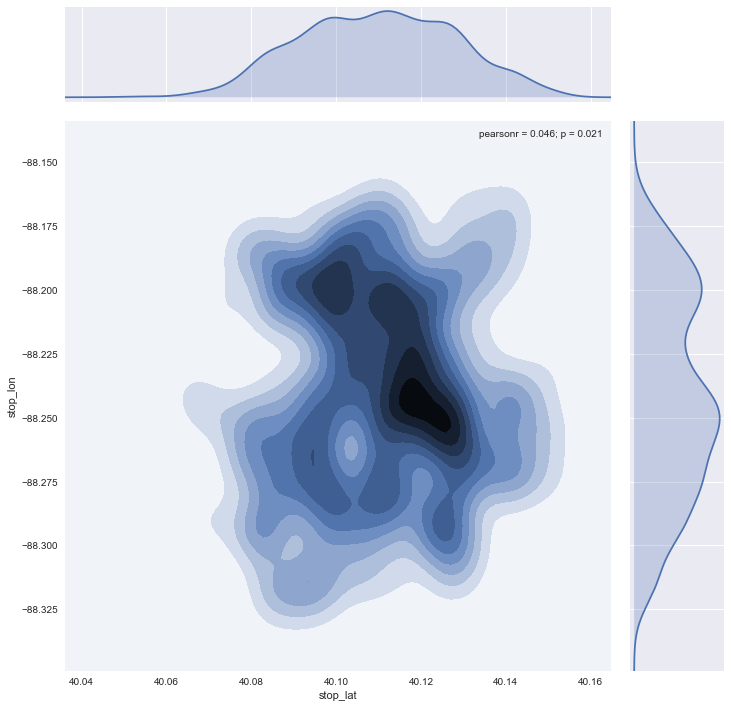

In [49]:
sns.jointplot(x="stop_lat", y="stop_lon", data=df, kind="kde", size=10)

/Users/Yueya/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


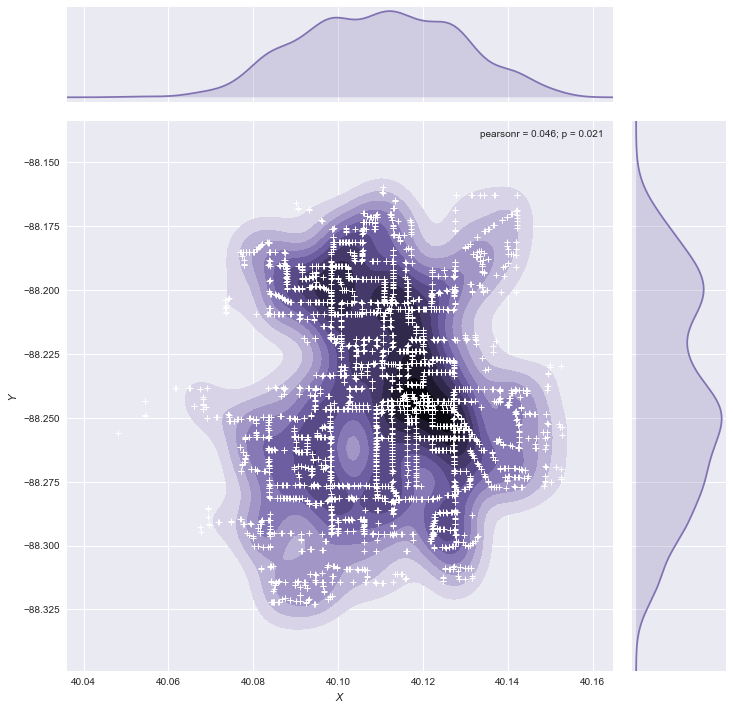

In [50]:
g = sns.jointplot(x="stop_lat", y="stop_lon", data=df, kind="kde", color="m", size = 10)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");